Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving comprehensive_mutual_funds_data.csv to comprehensive_mutual_funds_data.csv


In [3]:
df=pd.read_csv("comprehensive_mutual_funds_data.csv")

In [4]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


Replacing Risk Levels

In [5]:
df['risk_level'].replace({1:'Low',2:'Moderately Low',3:'Moderate',4:'Moderately High',5:'High',6:'Very High'},inplace=True)

In [7]:
df.shape

(814, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    object 
 8   alpha          814 non-null    object 
 9   sd             814 non-null    object 
 10  beta           814 non-null    object 
 11  sharpe         814 non-null    object 
 12  risk_level     814 non-null    object 
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [9]:
df.isnull().sum()

scheme_name        0
min_sip            0
min_lumpsum        0
expense_ratio      0
fund_size_cr       0
fund_age_yr        0
fund_manager       0
sortino            0
alpha              0
sd                 0
beta               0
sharpe             0
risk_level         0
amc_name           0
rating             0
category           0
sub_category       0
returns_1yr        0
returns_3yr       21
returns_5yr      167
dtype: int64

In [10]:
df.duplicated().sum()

0

investigating missing values in returns_3yr and returns_5yr

In [11]:
df[df['returns_3yr'].isnull()]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
61,AXIS Floater Fund,1000,5000,0.16,416.0,2,Aditya Pagaria,-,-,-,-,-,Moderately Low,Axis Mutual Fund,2,Debt,Floater Mutual Funds,5.8,NaN,NaN
104,Baroda BNP Paribas Banking & PSU Bond Fund,500,5000,0.39,40.0,2,Prashant Pimple,-,-,-,-,-,Moderately Low,Baroda BNP Paribas Mutual Fund,2,Debt,Banking and PSU Mutual Funds,2.5,NaN,NaN
125,BHARAT Bond FOF – April 2025 – Direct Growth,500,1000,0.06,3912.0,3,Dhawal Dalal,-,-,-,-,-,Moderately Low,Edelweiss Mutual Fund,2,Other,FoFs Domestic,2.6,NaN,NaN
154,DSP Floater Fund,500,500,0.24,983.0,2,Kedar Karnik,-,-,-,-,-,Moderately Low,DSP Mutual Fund,1,Debt,Floater Mutual Funds,4.4,NaN,NaN
398,Invesco India Medium Duration Fund,1000,1000,0.40,306.0,2,Vikas Garg,-,-,-,-,-,Moderate,Invesco Mutual Fund,2,Debt,Medium Duration Funds,3.5,NaN,NaN
411,ITI Banking & PSU Debt Fund,500,5000,0.15,27.0,2,Vikrant Mehta,-,-,-,-,-,Moderately Low,ITI Mutual Fund,5,Debt,Banking and PSU Mutual Funds,5.4,NaN,NaN
412,ITI Dynamic Bond Fund,500,5000,0.14,57.0,2,Vikrant Mehta,-,-,-,-,-,Moderately Low,ITI Mutual Fund,5,Debt,Dynamic Bond,5.7,NaN,NaN
417,ITI Ultra Short Duration Fund,500,5000,0.10,119.0,2,Vikrant Mehta,-,-,-,-,-,Moderately Low,ITI Mutual Fund,2,Debt,Ultra Short Duration Funds,5.3,NaN,NaN
495,Mahindra Manulife Short Duration Fund,500,1000,0.29,43.0,2,Rahul Pal,-,-,-,-,-,Moderate,Mahindra Manulife Mutual Fund,3,Debt,Short Duration Funds,4.4,NaN,NaN
497,Mirae Asset Banking and PSU Debt Fund,1000,5000,0.34,89.0,3,Basant Bafna,-,-,-,-,-,Moderately Low,Mirae Asset Mutual Fund,3,Debt,Banking and PSU Mutual Funds,3.7,NaN,NaN


In [12]:
df[df['returns_5yr'].isnull()]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,Very High,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
38,Aditya Birla SL Overnight Fund,0,5000,0.07,13399.0,4,Kaustubh Gupta,0.11,0.58,0.35,0.43,0.02,Low,Aditya Birla Sun Life Mutual Fund,3,Debt,Overnight Mutual Funds,5.4,3.9,NaN
41,Aditya Birla SL Retirement-The 30s Plan-Dir Gr...,500,1000,1.06,258.0,4,Dhaval Shah,2.41,-5.61,14.94,0.84,0.94,Very High,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Retirement Funds,0.0,17.9,NaN
42,Aditya Birla SL Retirement-The 40s Plan-Dir Gr...,500,1000,1.07,91.0,4,Dhaval Shah,2.34,-3.14,11.86,0.77,0.93,Very High,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Retirement Funds,-0.1,15.0,NaN
43,Aditya Birla SL Retirement-The 50s Plan-Dir Gr...,500,1000,0.63,27.0,4,Dhaval Shah,0.29,-2.04,2.99,0.34,0.13,Moderately High,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Retirement Funds,3.0,4.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,UTI-Equity Savings Fund,0,5000,0.68,257.0,5,V Srivatsa,4.06,3.98,5.99,0.91,1.75,Moderate,UTI Mutual Fund,4,Hybrid,Equity Savings Mutual Funds,6.1,14.7,NaN
786,UTI-Floater Fund,500,500,0.35,1637.0,4,Sudhir Agrawal,3.07,3.41,1.05,1.41,1.45,Moderately Low,UTI Mutual Fund,3,Debt,Floater Mutual Funds,5.1,5.9,NaN
801,UTI-Nifty Next 50 Index Fund,0,5000,0.33,1926.0,5,Sharwan Kumar Goyal,1.71,-4.62,18.16,0.99,0.97,Very High,UTI Mutual Fund,2,Other,Index Funds,-6.4,22.2,NaN
811,WhiteOak Capital Liquid Fund,500,500,0.26,197.0,4,Piyush Baranwal,-0.42,0.93,0.39,0.72,-0.07,Low,WhiteOak Capital Mutual Fund,1,Debt,Liquid Mutual Funds,5.3,3.8,NaN


Mean returns across category

In [44]:
mean_returns_by_category = df.groupby('category')[['returns_3yr', 'returns_5yr']].mean()


In [45]:
mean_returns_by_category

,returns_3yr,returns_5yr
category,,
Debt,6.228517,6.385446
Equity,29.738111,12.069767
Hybrid,15.272414,8.581053
Other,20.792405,10.710938
Solution Oriented,18.167857,9.747059


In [49]:
for col in ['sortino','alpha','sd','beta','sharpe']:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # 'coerce' replaces non-convertible values with NaN
    except KeyError:
        print(f"Column '{col}' not found in the DataFrame.")

# Calculate the mean ratios by category
mean_ratios_by_category = df.groupby('category')[['sortino','alpha','sd','beta','sharpe']].mean()
mean_ratios_by_category

,sortino,alpha,sd,beta,sharpe
category,,,,,
Debt,2.139885,2.160000,2.092107,0.807214,0.892366
Equity,3.110392,3.402550,16.959477,0.878642,1.459837
Hybrid,2.776552,2.486034,7.493190,0.707155,1.311638
Other,2.420633,0.513594,15.480506,0.850938,1.090253
Solution Oriented,2.589286,0.700357,10.272143,0.765714,1.204286


In [51]:
# imputing missing values with mean of category
# Use 'transform' to align the index
df['returns_3yr'] = df.groupby('category')['returns_3yr'].transform(lambda x: x.fillna(x.mean()))
df['returns_5yr'] = df.groupby('category')['returns_5yr'].transform(lambda x: x.fillna(x.mean()))
df['sortino'] = df.groupby('category')['sortino'].transform(lambda x: x.fillna(x.mean()))
df['alpha'] = df.groupby('category')['alpha'].transform(lambda x: x.fillna(x.mean()))
df['sd'] = df.groupby('category')['sd'].transform(lambda x: x.fillna(x.mean()))
df['beta'] = df.groupby('category')['beta'].transform(lambda x: x.fillna(x.mean()))
df['sharpe'] = df.groupby('category')['sharpe'].transform(lambda x: x.fillna(x.mean()))

In [52]:
# verifying missing values are imputed
df.isnull().sum()

scheme_name      0
min_sip          0
min_lumpsum      0
expense_ratio    0
fund_size_cr     0
fund_age_yr      0
fund_manager     0
sortino          0
alpha            0
sd               0
beta             0
sharpe           0
risk_level       0
amc_name         0
rating           0
category         0
sub_category     0
returns_1yr      0
returns_3yr      0
returns_5yr      0
dtype: int64

In [53]:
# checking statistics of numerical columns
df.describe()

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,sortino,alpha,sd,beta,sharpe,rating,returns_1yr,returns_3yr,returns_5yr
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,528.500000,3047.468059,0.713231,3812.854214,8.319410,2.640883,2.464598,10.084476,0.822852,1.197011,2.641278,3.921376,18.254880,9.389900
std,369.184517,2514.619513,0.482161,7181.479475,2.640622,1.374909,3.859215,7.808093,1.275605,0.531163,1.463476,6.675502,12.101639,3.497044
min,0.000000,0.000000,0.000000,2.380000,1.000000,-1.770000,-13.360000,0.270000,-31.860000,-0.820000,0.000000,-19.700000,3.300000,-4.100000
25%,150.000000,500.000000,0.310000,175.250000,6.000000,1.810000,0.513594,2.092107,0.710000,0.894275,2.000000,1.500000,6.228517,6.389085
50%,500.000000,5000.000000,0.615000,940.500000,10.000000,2.825000,1.885000,11.870000,0.850938,1.290000,3.000000,4.400000,18.050000,8.800000
75%,1000.000000,5000.000000,1.030000,3819.000000,10.000000,3.460000,3.727500,16.410000,0.960000,1.540000,4.000000,5.600000,27.000000,12.069767
max,2000.000000,25000.000000,2.590000,57052.000000,17.000000,12.570000,27.240000,77.720000,5.400000,3.520000,5.000000,130.800000,71.400000,23.200000


In [54]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,Moderate,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.900000
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.10,Low,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.500000
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,High,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.700000
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.90,Very High,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,9.747059
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,Very High,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.700000


Fund Manager Analysis

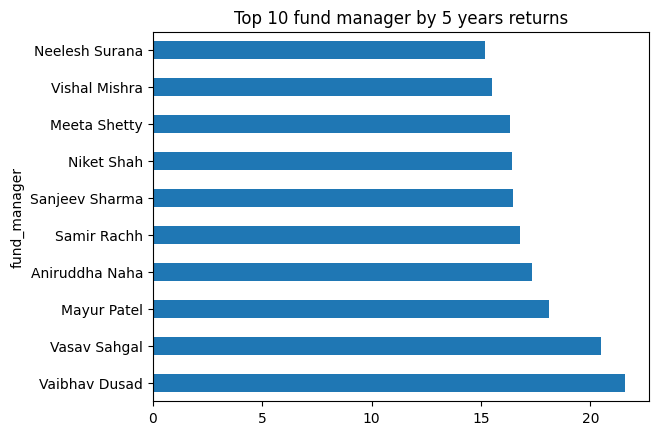

In [55]:
df.groupby(['fund_manager'])['returns_5yr'].mean().sort_values(ascending=False).nlargest(10).plot(kind='barh')
plt.title('Top 10 fund manager by 5 years returns')

plt.show()

In [56]:
# creating category wise dataframes

debt_df = df[df['category'] == 'Debt']
equity_df = df[df['category'] == 'Equity']
hybrid_df = df[df['category'] == 'Hybrid']
other_df = df[df['category'] == 'Other']
solution_df = df[df['category'] == 'Solution Oriented']

In [57]:
# calculating top 5 fund manager with avg highest returns in each category

top_5_debt = debt_df.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).head().reset_index()
top_5_equity = equity_df.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).head().reset_index()
top_5_hybrid = hybrid_df.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).head().reset_index()
top_5_solution = solution_df.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).head().reset_index()
top_5_other = other_df.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).head().reset_index()

<ipython-input-59-fabd83822998>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(top_5_debt['fund_manager'],rotation='vertical')
<ipython-input-59-fabd83822998>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(top_5_equity['fund_manager'],rotation='vertical')
<ipython-input-59-fabd83822998>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(top_5_hybrid['fund_manager'],rotation='vertical')
<ipython-input-59-fabd83822998>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[3].set_xticklabels(top_5_solution['fund_manager'],rotation='vertical')
<ipython-input-59-fabd83822998>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[4].set_xticklabels(top_5_other['fund_manager'],rotation='vertical')


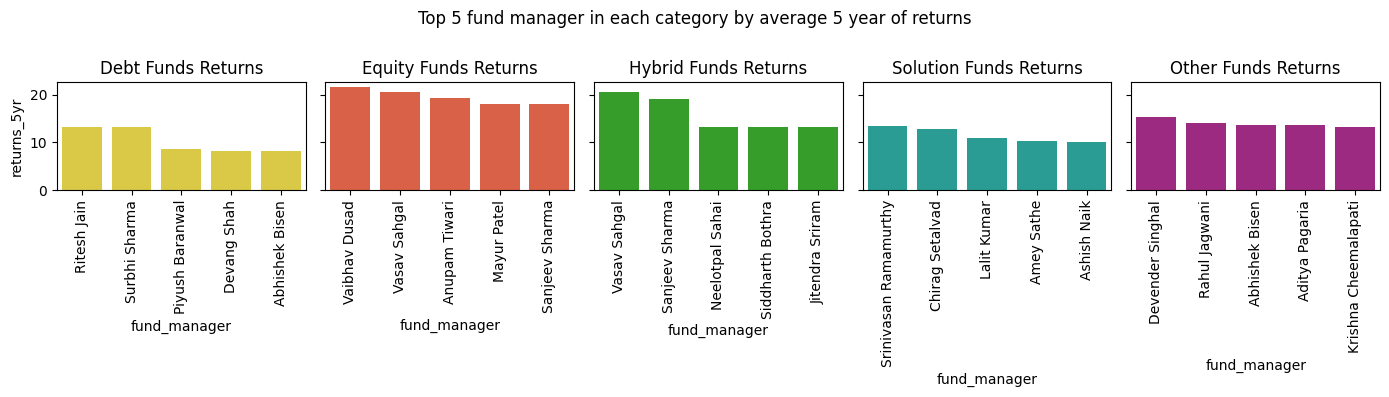

In [59]:
# create the plot
fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(14, 4),sharey='row')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_debt, ax=ax[0],color='#F1DC2F')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_equity, ax=ax[1],color='#F1512F')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_hybrid, ax=ax[2],color='#27AF17')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_solution, ax=ax[3],color='#17AFA3')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_other, ax=ax[4],color='#AF178A')

# set plot title and x labels
ax[0].set_title('Debt Funds Returns')
ax[0].set_xticklabels(top_5_debt['fund_manager'],rotation='vertical')
ax[1].set_title('Equity Funds Returns')
ax[1].set_xticklabels(top_5_equity['fund_manager'],rotation='vertical')
ax[2].set_title('Hybrid Funds Returns')
ax[2].set_xticklabels(top_5_hybrid['fund_manager'],rotation='vertical')
ax[3].set_title('Solution Funds Returns')
ax[3].set_xticklabels(top_5_solution['fund_manager'],rotation='vertical')
ax[4].set_title('Other Funds Returns')
ax[4].set_xticklabels(top_5_other['fund_manager'],rotation='vertical')

# show the plot
plt.tight_layout()
plt.suptitle('Top 5 fund manager in each category by average 5 year of returns')
plt.subplots_adjust(top=0.8)
plt.show()


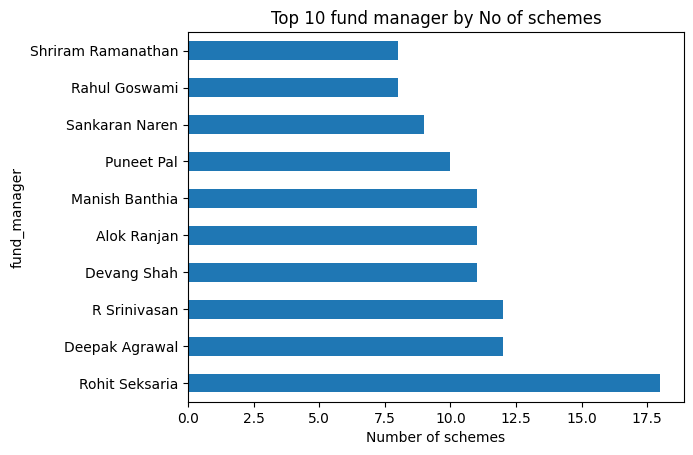

In [60]:
# top 10 fund manager by the number of schemes

df['fund_manager'].value_counts().nlargest(10).plot(kind='barh')
plt.xlabel('Number of schemes')
plt.title('Top 10 fund manager by No of schemes')
plt.show()

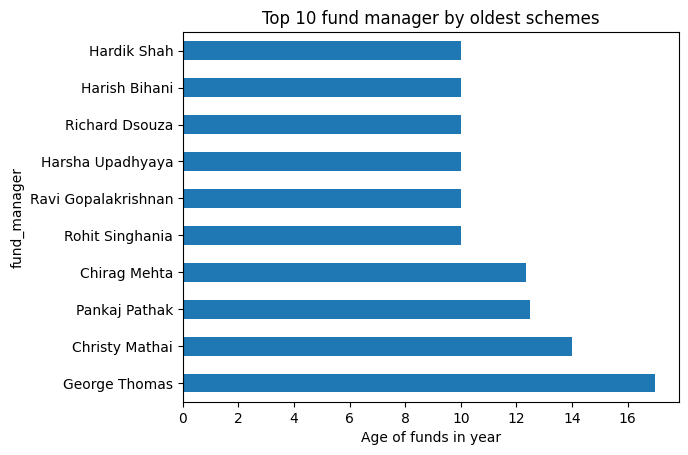

In [61]:
# top 10 fund manager by the mean age of funds
df.groupby(['fund_manager'])['fund_age_yr'].mean().sort_values(ascending=False).nlargest(10).plot(kind='barh')
plt.xlabel('Age of funds in year')
plt.title('Top 10 fund manager by oldest schemes')
plt.show()

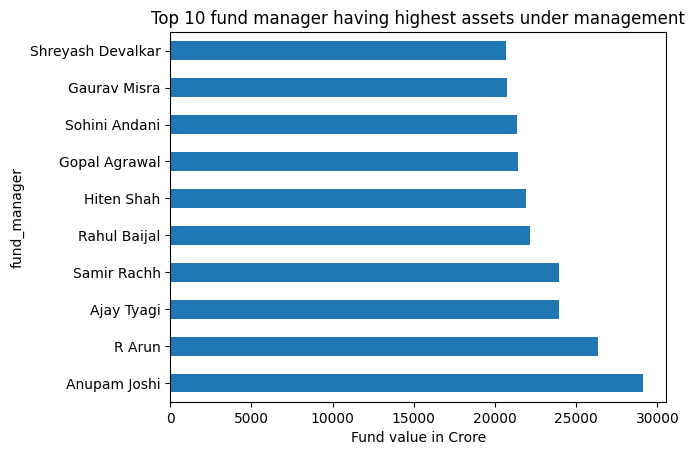

In [62]:
# top 10 fund manager by the assets under management
df.groupby(['fund_manager'])['fund_size_cr'].mean().sort_values(ascending=False).nlargest(10).plot(kind='barh')
plt.xlabel('Fund value in Crore')
plt.title('Top 10 fund manager having highest assets under management')
plt.show()

Analysis on min_sip and min_lumpsum

<Axes: ylabel='min_sip'>

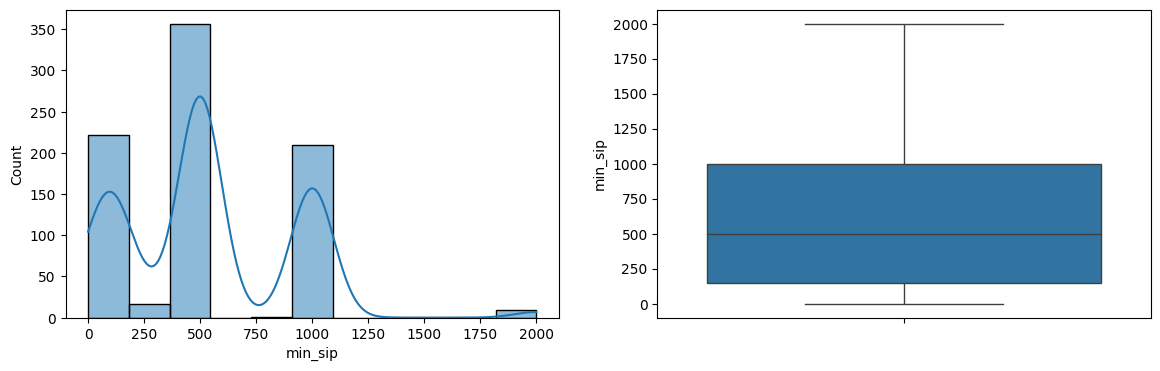

In [63]:
# distribution of min_sip
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14, 4))

sns.histplot(df['min_sip'],ax=ax[0],kde=True)
sns.boxplot(df['min_sip'],ax=ax[1])

<Axes: ylabel='min_lumpsum'>

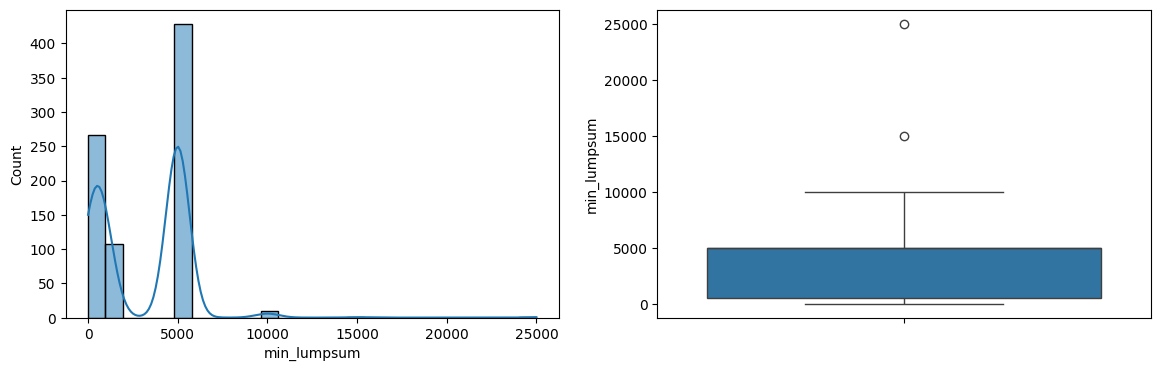

In [64]:
# distribution of min_lumpsum
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14, 4))

sns.histplot(df['min_lumpsum'],ax=ax[0],kde=True)
sns.boxplot(df['min_lumpsum'],ax=ax[1])

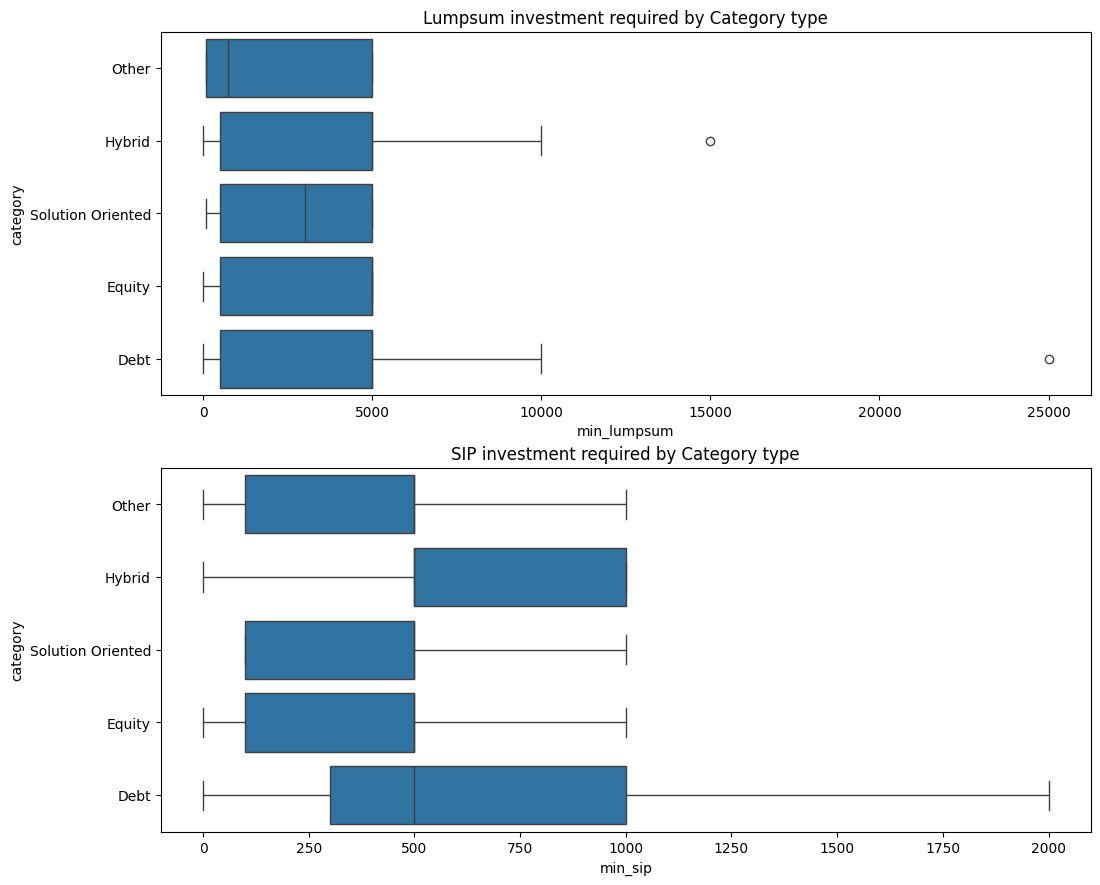

In [65]:
# distribution of min_sip and min_lumpsum by category type
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

sns.boxplot(data = df,y=df['category'],x=df['min_lumpsum'],ax=axes[0])
sns.boxplot(data = df,y=df['category'],x=df['min_sip'],ax=axes[1])

axes[0].set_title('Lumpsum investment required by Category type')
axes[1].set_title('SIP investment required by Category type')
plt.subplots_adjust(bottom=4,top=5)
plt.show()

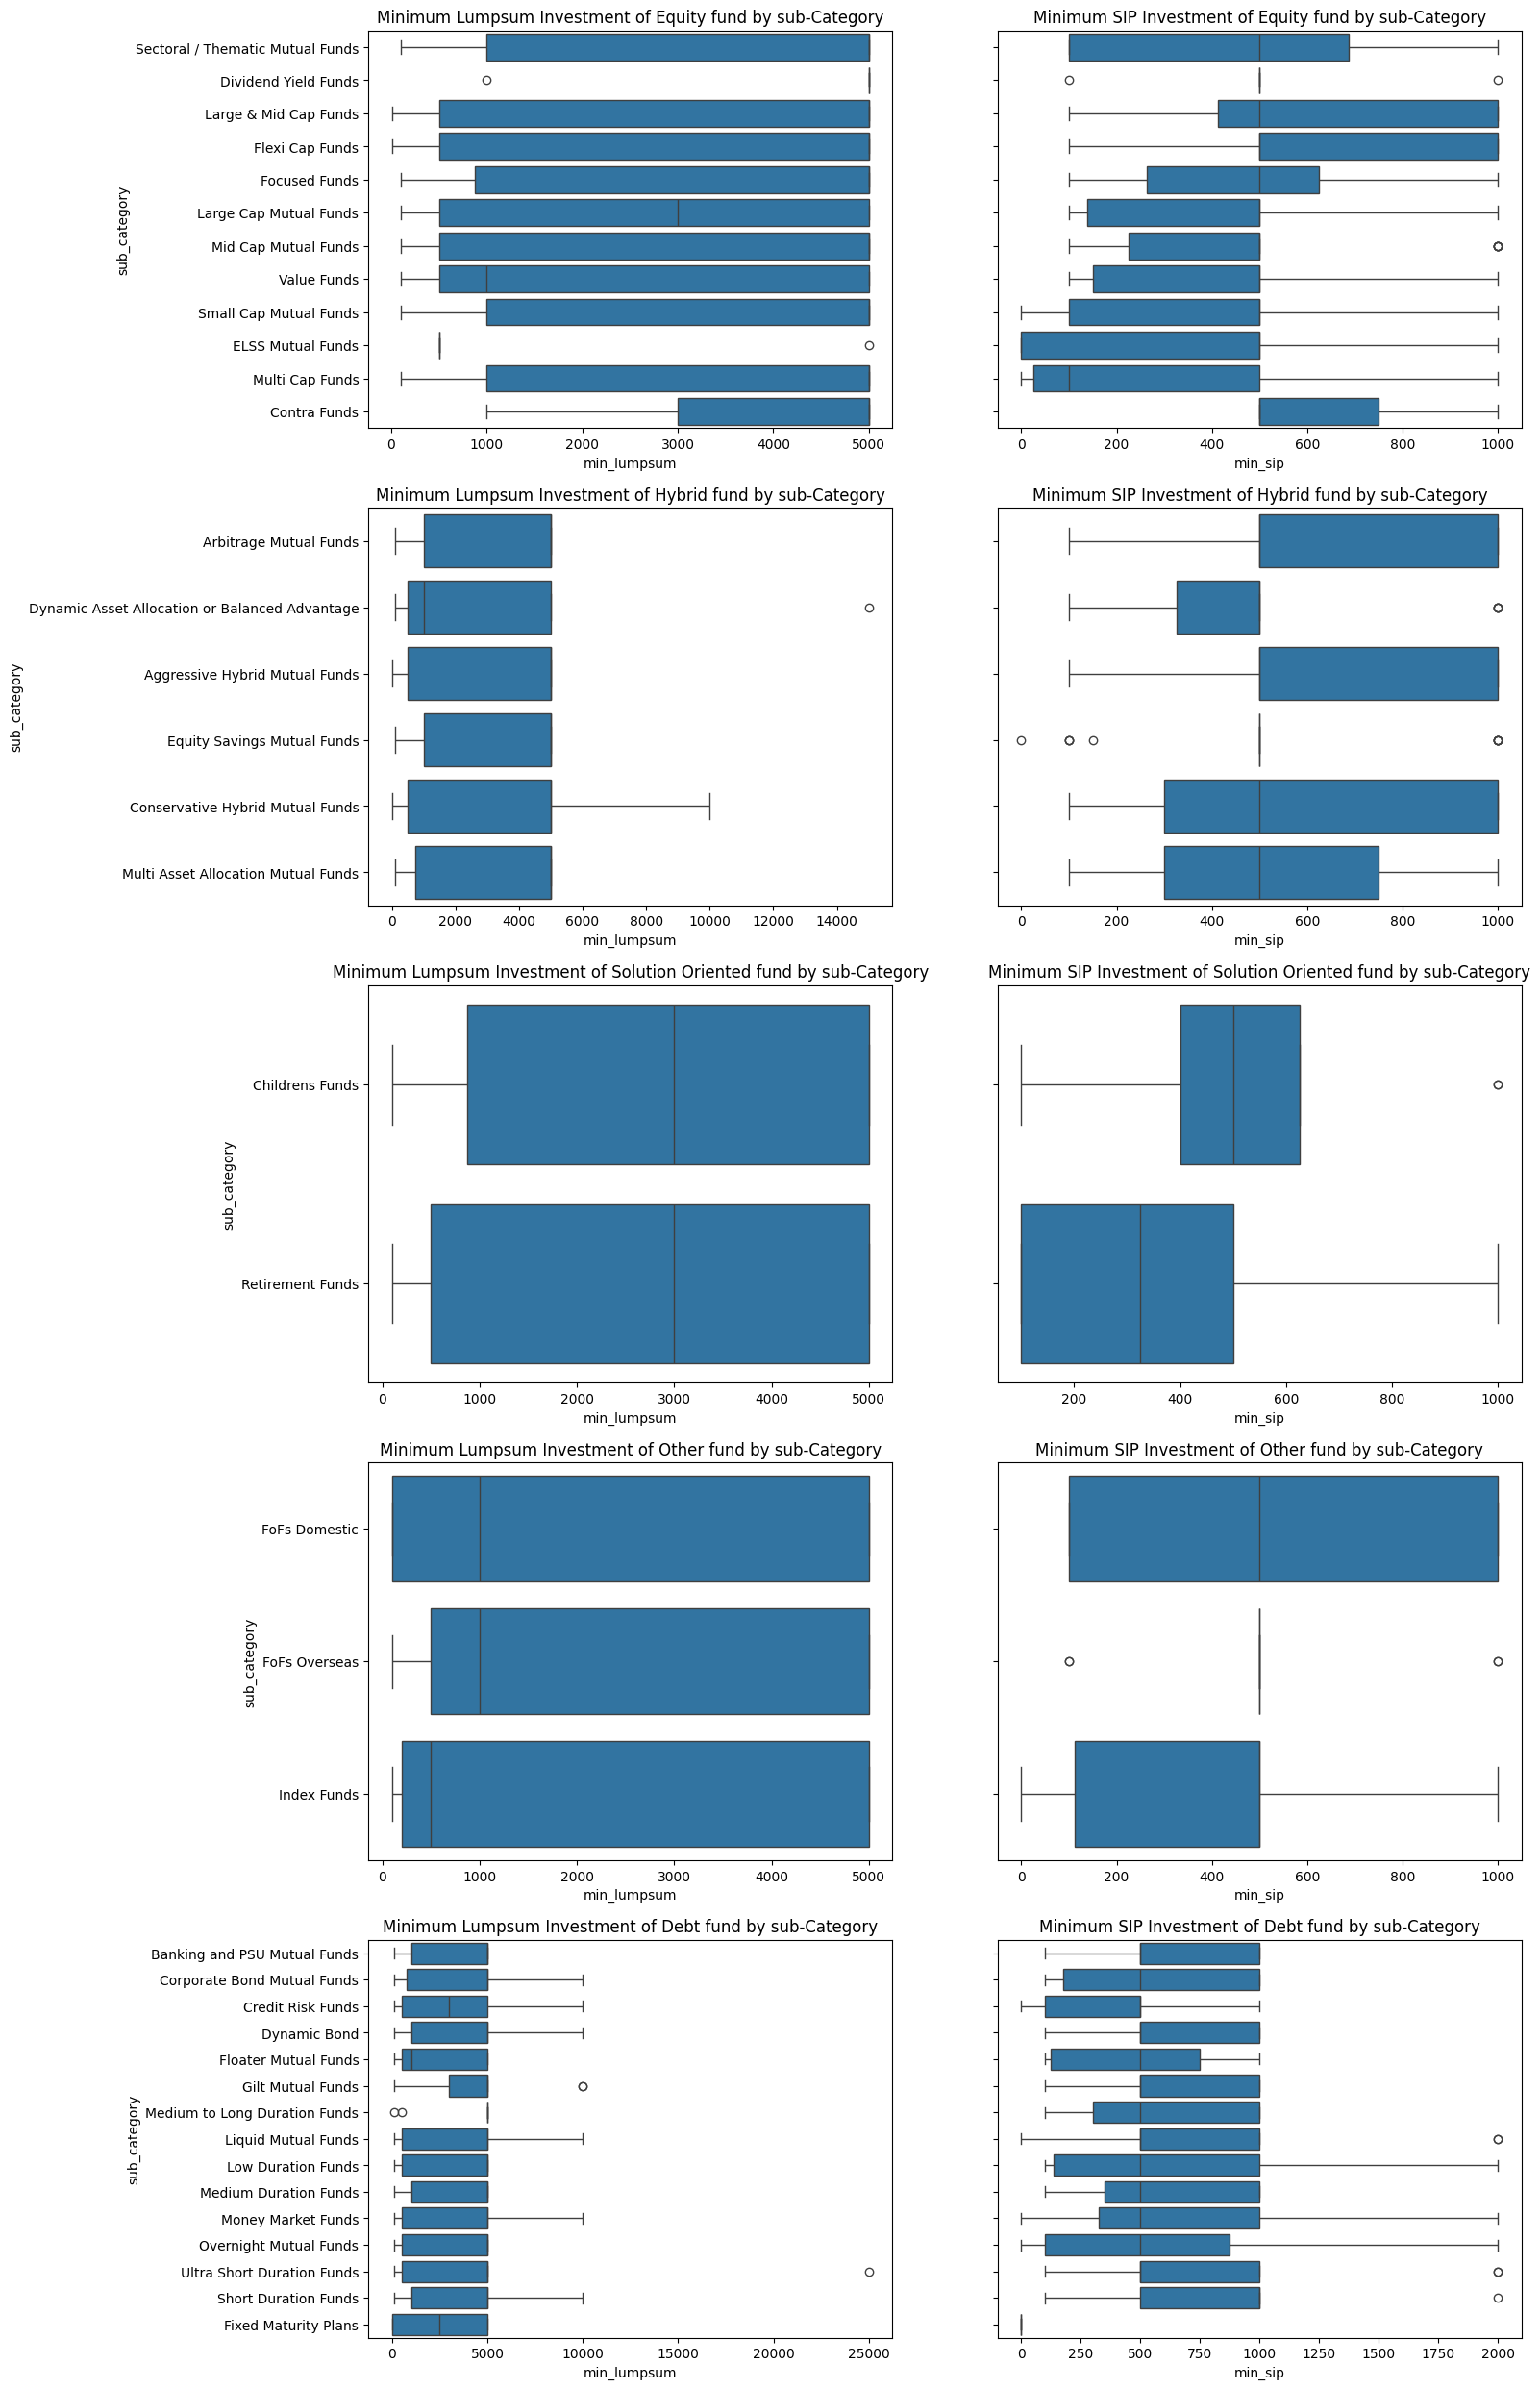

In [66]:
# distribution of min_sip,min_lumpsum by sub_category type

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 16),sharey='row')

sns.boxplot(equity_df,y='sub_category',x='min_lumpsum',ax=axes[0,0])
sns.boxplot(hybrid_df,y='sub_category',x='min_lumpsum',ax=axes[1,0])
sns.boxplot(solution_df,y='sub_category',x='min_lumpsum',ax=axes[2,0])
sns.boxplot(other_df,y='sub_category',x='min_lumpsum',ax=axes[3,0])
sns.boxplot(debt_df,y='sub_category',x='min_lumpsum',ax=axes[4,0])

axes[0,0].set_title('Minimum Lumpsum Investment of Equity fund by sub-Category')
axes[1,0].set_title('Minimum Lumpsum Investment of Hybrid fund by sub-Category')
axes[2,0].set_title('Minimum Lumpsum Investment of Solution Oriented fund by sub-Category')
axes[3,0].set_title('Minimum Lumpsum Investment of Other fund by sub-Category')
axes[4,0].set_title('Minimum Lumpsum Investment of Debt fund by sub-Category')

sns.boxplot(equity_df,y='sub_category',x='min_sip',ax=axes[0,1])
sns.boxplot(hybrid_df,y='sub_category',x='min_sip',ax=axes[1,1])
sns.boxplot(solution_df,y='sub_category',x='min_sip',ax=axes[2,1])
sns.boxplot(other_df,y='sub_category',x='min_sip',ax=axes[3,1])
sns.boxplot(debt_df,y='sub_category',x='min_sip',ax=axes[4,1])

axes[0,1].set_title('Minimum SIP Investment of Equity fund by sub-Category')
axes[1,1].set_title('Minimum SIP Investment of Hybrid fund by sub-Category')
axes[2,1].set_title('Minimum SIP Investment of Solution Oriented fund by sub-Category')
axes[3,1].set_title('Minimum SIP Investment of Other fund by sub-Category')
axes[4,1].set_title('Minimum SIP Investment of Debt fund by sub-Category')

plt.subplots_adjust(bottom=2.5,top=4,left=2,right=3)
plt.show()
